# Jupyter Notebook for CS 415 HW 2
## Problem 3 Corner Detection

# Part I: Moravec Corner Detection

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import load_image, save_image
# from exact_Ep_d import exact_Ep_d

%load_ext autoreload
%autoreload 2

image1 shape:  (1707, 2560, 3)


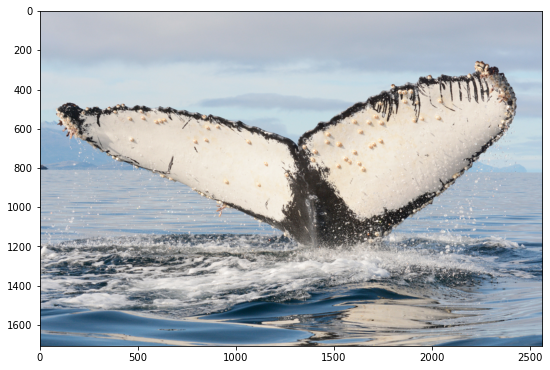

In [7]:
# load and display images
# image1 = load_image('chess.jpg')
image1 = load_image('hw_fluke_1.png')
print('image1 shape: ', image1.shape)
plt.figure(figsize=(9,9))
plt.imshow(image1)

In [4]:
from PIL import Image

def draw_point(image, x, y, radius = 1):
    """Draw a point centered at (x, y) with specified radius."""
    for dx in range(-radius, radius + 1):
        for dy in range(-radius, radius + 1):
            image.putpixel((x+dx, y+dy), (0,255, 0))

def draw_corners(image, corners_map, radius = 1):
    """Draw a point for each possible corner."""
    for corner in corners_map:
        draw_point(image, corner[0], corner[1], radius)

# My Moravec Implementation: Comparison Amongst Thresholds
### (Use this for submission)
moravec_corners: currently contains all three functions, w --> need to change to adjust window size if needed, and currently using (u,v) to determine direction as opposed to theta values

In [36]:
from moravec_corners import moravec_corners

### Plotting and Comparing Results of My Moravec Implementation at Diff. Thresholds

In [40]:
w = 1
radius = 1
I = Image.open('hw_fluke_1.png').convert('L')

thresholds = [250, 500, 750, 1000]
corners_t = []

for t in thresholds:
    corner_list = moravec_corners(I,t,w)
    corners_t.append(corner_list)

In [41]:
hw_img_1 = Image.open('hw_fluke_1.png')
hw_img_2 = Image.open('hw_fluke_1.png')
hw_img_3 = Image.open('hw_fluke_1.png')
hw_img_4 = Image.open('hw_fluke_1.png')

img = [hw_img_1, hw_img_2, hw_img_3, hw_img_4]
img

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2560x1707 at 0x7FD60EE95210>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2560x1707 at 0x7FD60EAB12D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2560x1707 at 0x7FD60EAB1790>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2560x1707 at 0x7FD60EAD3F10>]

# Results + Discussion from Moravec Implementation

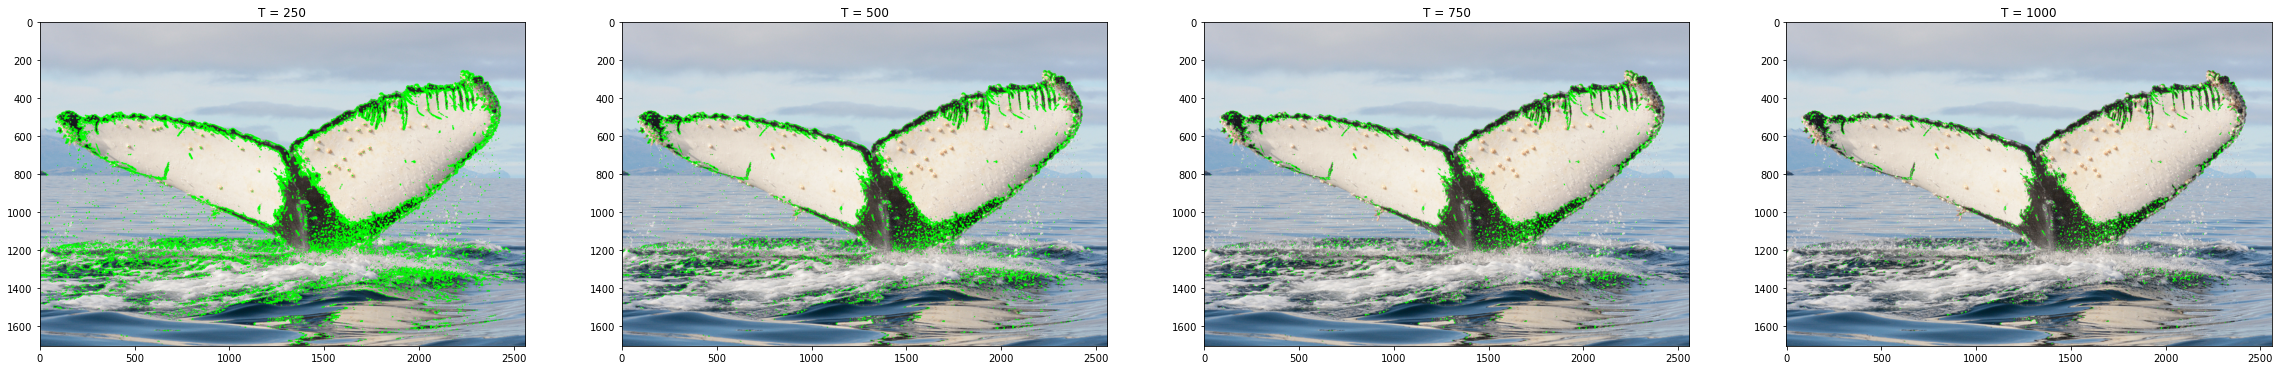

In [42]:
radius = 1

pos = [141, 142, 143, 144]
fig = plt.figure(figsize=(40,40))
for i in range(0, len(corners_t)):
    draw_corners(img[i], corners_t[i], radius)
    ax = fig.add_subplot(pos[i])
    plt.imshow(img[i])
    ax.title.set_text('T = ' + str(thresholds[i]))
                
plt.show()

Discussion: 

From the plots above, we can see that as our threshold T increases, our algorithm becomes increasingly selective in deciding what points qualify as corners. The best result is produced for T=1000, 
as the number of water pixels near the base of the whale fluke (not true corners) in the images above decreases, while true corners such as those outlininig the whale's fluke are still classified as such by the corner detector.  

In general, while a lower threshold does include the most number of corners identified, it also includes a pool of irrelevant points that don't actually qualify as corners to the human eye. Rather, a higher more selective threshold can eliminate these false positives, and still keep the truly important corners for feature detection.

# Part II: Harris Corner Detection
OpenCV tutorial + explanation of harris corner detection: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

### My Harris Corner Detector Implementation

In [6]:
from PIL import Image
#load img and convert to grayscale
image_path = 'chess.jpg'
img = Image.open(image_path)

#grayscale
imggray = Image.open(image_path).convert("L")

In [7]:
imggray.size

(612, 612)

In [8]:
# Part C - Implement harris_energy.py to compute matrix Mp
from harris_energy import harris_energy

#note: currently not using w parameter to generate gaussian weights at each pixel. 
#instead, we use ndi.gaussian_filter to apply a gaussian weight to the components of structure tensor M
w = 1
M = harris_energy(imggray, w)

In [9]:
M.shape

(2, 2, 612, 612)

In [10]:
# this is Ixx
Ixx = M[0][0]
Ixy = M[0][1]
Iyy = M[1][1]

print(Ixx.shape, Ixy.shape, Iyy.shape)

(612, 612) (612, 612) (612, 612)


In [11]:
# Part D - Implement a harris_corners.py function that outputs Harris Corners
from harris_corners import harris_corners
C_hc, harris_response = harris_corners(imggray, w = 1, lambda_k=0.04, t=0)

In [12]:
#plotting corners in C_hc onto image
# draw_corners(img, C_hc)

for x,y in C_hc:
    try:
        img.putpixel((x,y), ((0, 255, 0)))
    except IndexError:
        pass

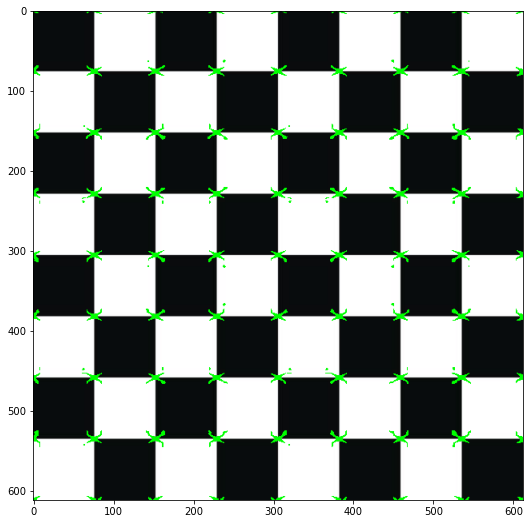

In [13]:
plt.figure(figsize=(9,9))
plt.imshow(img)

## Comparing HCD performance among various thresholds

In [14]:
from harris_corners import harris_corners

In [15]:
img_file = 'chess.jpg'

hw_img_1 = Image.open(img_file).convert('L')
hw_img_2 = Image.open(img_file).convert('L')
hw_img_3 = Image.open(img_file).convert('L')
hw_img_4 = Image.open(img_file).convert('L')

hw_img_c_1 = Image.open(img_file)
hw_img_c_2 = Image.open(img_file)
hw_img_c_3 = Image.open(img_file)
hw_img_c_4 = Image.open(img_file)

img = [hw_img_1, hw_img_2, hw_img_3, hw_img_4]
img_color = [hw_img_c_1, hw_img_c_2, hw_img_c_3, hw_img_c_4]

img

[<PIL.Image.Image image mode=L size=612x612 at 0x7FF6A09A51D0>,
 <PIL.Image.Image image mode=L size=612x612 at 0x7FF6A0A30E10>,
 <PIL.Image.Image image mode=L size=612x612 at 0x7FF6A15A6150>,
 <PIL.Image.Image image mode=L size=612x612 at 0x7FF6A0A30D10>]

In [16]:
hcd = []
harris_responses = []

# thresholds = [250, 500, 750, 1000]
# thresholds = [500, 2500, 5000, 10000]
thresholds = [500, 10000, 50000, 100000]

for i in range(0,len(img)):
    hc,r = harris_corners( img[i], 1, 0.04, thresholds[i] )
    hcd.append(hc)
    harris_responses.append(r)

In [17]:
def draw_hc_corners(C_hc, img):
    for x,y in C_hc:
        try:
            img.putpixel((x,y), (0, 255, 0))
        except IndexError:
            pass

# Results + Discussion - Harris Corner Implementation at Different Thresholds

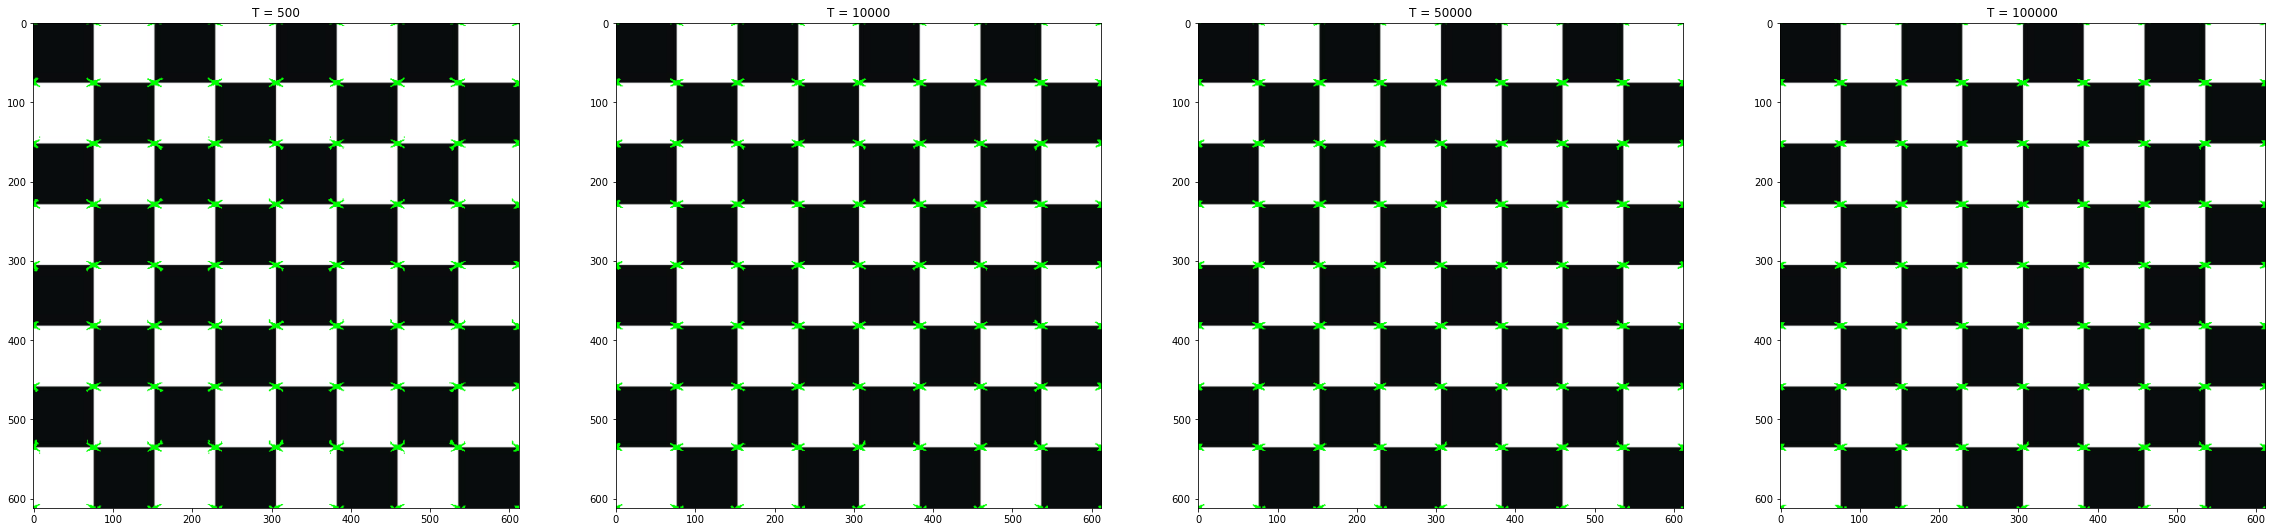

In [18]:
# radius = 1
pos = [141, 142, 143, 144]
fig = plt.figure(figsize=(40,40))

for i in range(0, len(hcd)):
    #draw_corners(img[i], hcd[i], radius)
    draw_hc_corners(hcd[i], img_color[i]) 
    ax = fig.add_subplot(pos[i])
    plt.imshow(img_color[i])
    ax.title.set_text('T = ' + str(thresholds[i]))
                
plt.show()

In [19]:
print('number of corners detected at T=500: ', len(hcd[0]))
print('number of corners detected at T=10000: ', len(hcd[1]))
print('number of corners detected at T=50000: ', len(hcd[2]))
print('number of corners detected at T=100000: ', len(hcd[3]))

number of corners detected at T=500:  6644
number of corners detected at T=10000:  5942
number of corners detected at T=50000:  5668
number of corners detected at T=100000:  5513


Despite the large jumps in threshold, there are no significant, apparent changes in the number of corners detected by our harris corner detector implementation. Compared to the moravec detector, this implementation is a lot less sensitive to changes in threshold. As seen from the plots above, the corners are detected at each appropriate point in our chess board.